# A.1 HMM Signal Source

In this first project assignment you will discover how an HMM can generate a sequence with a kind of structured randomness that is typical of many real-life signals. You will do this by coding an HMM signal source in Python. You will also have to verify that your implementation is correct. You must submit your work before the deadline, as instructed on the course project web page.

This assignment will be based on a few classes that have been provided to you in the PattRecClasses directory. The PattRecClasses package contains definitions of a few classes that are intended to work together. Each class is defined in a separate Python file:

    DiscreteD   %Implements discrete distribution
    GaussD      %Implements a Gaussian scalar or vector distribution
    HMM         %A general HMM class
    MarkovChain %Implements the state-generator part of an HMM

In [1]:
!git clone https://github.com/Ignas12345/Pattern_recognition_assignment_2.git
!mv Pattern_recognition_assignment_2/* ./

Cloning into 'Pattern_recognition_assignment_2'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 65 (delta 24), reused 29 (delta 9), pack-reused 0
Receiving objects: 100% (65/65), 397.48 KiB | 4.62 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [1]:
from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain
from matplotlib import pyplot as plt

import numpy as np

In [2]:
observations = [-0.2, 2.6, 1.3]

g1 = GaussD(means=[0], stdevs=[1])
g2 = GaussD(means=[3], stdevs=[2])

nStates = 2
nSamples = len(observations)
pX = np.zeros((nStates, nSamples))

for t in range(nSamples):
  for j, g in enumerate([g1, g2]):
      pX[j, t] = g.prob(observations[t])

#do the scaling
scale_factors = np.max(pX, axis = 0)
pX /= scale_factors

q = np.array([1, 0])
A = np.array([[0.9, 0.1, 0], [0, 0.9, 0.1]])
chain = MarkovChain(q, A)
alpha, c = chain.forward(pX)
print("Gaussian probabilities", pX)
print("final alpha ", alpha)
print("final c ", c)
b = chain.backward(c, pX)
print("scale factors", scale_factors)
print("final beta hat", b)
hmm = HMM(chain, [g1,g2])
log_prob = hmm.logprob(pX, scale_factors)

Gaussian probabilities [[1.         0.06947052 1.        ]
 [0.14182701 1.         0.81107303]]
final alpha  [[1.         0.38470424 0.41887466]
 [0.         0.61529576 0.58112534]]
final c  [[1.        ]
 [0.16252347]
 [0.82658096]
 [0.05811253]]
scale factors [0.39104269 0.19552135 0.17136859]
final beta hat [[1.         1.03893571 0.        ]
 [8.41537925 9.35042138 2.08182773]]


In [3]:
log_prob

-9.187726979475208

In [ ]:
q = np.array([1.0, 0.0])
A = np.array([[0.9, 0.1, 0.0], [0.0, 0.9,0.1]])
tmax = 10
mc = MarkovChain(q, A)
b1 = GaussD( means=[0], stdevs=[1] )
b2 = GaussD( means=[3], stdevs=[2] )
h  = HMM( mc, [b1, b2])
observations = [-0.2, 2.6, 1.3]

In [ ]:
X, S = h.rand(tmax)

In [ ]:
nStates = mc.nStates
nObservations = len(observations)
pX = np.ones((nStates, nObservations))
pX[0,:] = b1.scaled_prob(observations)
pX[1,:] = b2.scaled_prob(observations)

AttributeError: 'GaussD' object has no attribute 'scaled_prob'

In [ ]:
for i in range(nStates):
  pX[i,:] = h.outputDistr[i].prob(observations)
for j in range(nObservations):
  pX[:,j] /= np.sum(pX[:,j])

In [ ]:
np.arange(1, nObservations)

array([1, 2])

In [ ]:
pX

array([[0.8757894 , 0.06495786, 0.55215885],
       [0.1242106 , 0.93504214, 0.44784115]])

In [ ]:
mc.forward(pX)

(array([[1.        , 0.38470424, 0.41887466],
        [0.        , 0.61529576, 0.58112534]]),
 array([[0.8757894 ],
        [0.15196629],
        [0.45640399],
        [0.05811253]]),
 array([0.19117606, 0.26522792]))

An HMM object consists of one object called StateGen of class MarkovChain and one OutputDistr object array of class DiscreteD, GaussD, or GaussMixD, to represent the state-conditional HMM output distributions.

> The purpose of this class structure is to allow extensions to any type of output probability distribution without changing the other classes.

You can easily define additional distribution types yourself, if needed. Regardless of its type, the array of output distributions must include exactly one element for each of the possible MarkovChain states. It is very easy to define a simple HMM using the various class constructor methods:

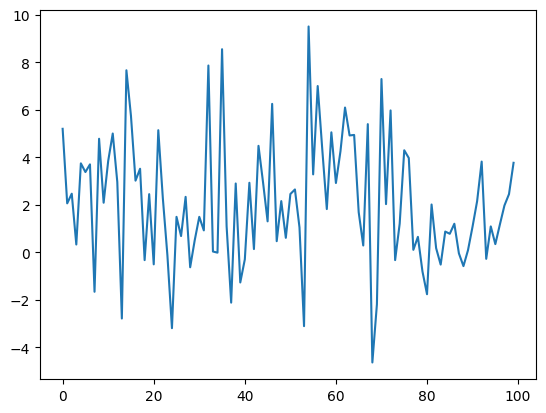

In [ ]:

# Example: Define and use a simple infinite-duration HMM

# State generator
mc = MarkovChain( np.array( [ 0.5, 0.5 ] ), np.array( [ [ 0.9, 0.1 ], [ 0.05, 0.95 ] ] ) )

g1 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g2 = GaussD( means=[2], stdevs=[3] )   # Distribution for state = 2
h  = HMM( mc, [g1, g2])                # The HMM

# Generate an output sequence
x,s = h.rand( 100 )

plt.plot( x[0] )

Exampe of plot for the above code. (You can uncomment and test the above code when you have completed A.1.1.)

<img src="https://github.com/Ignas12345/Pattern_recognition_asssignment_1/blob/main/images/hmm_example.png?raw=1" alt="test example" style="width: 300px;">

You will find that many of the class methods have already been implemented for you, although the code can probably be improved.

### Question 2:

In [ ]:
q = np.array([0.75, 0.25])
A = np.array([[0.99, 0.01], [0.03, 0.97]])
tmax = 10000
mc = MarkovChain(q, A)
S = mc.rand(tmax)
p_S_t_1 = S.count(1)/len(S)
p_S_t_2 = S.count(2)/len(S)
print('p_S_t_1 = ' + str(p_S_t_1))
print('p_S_t_2 = ' + str(p_S_t_2))

p_S_t_1 = 0.7109
p_S_t_2 = 0.2891


### Question 3:

In [ ]:
q = np.array([0.75, 0.25])
A = np.array([[0.99, 0.01], [0.03, 0.97]])
tmax = 10000
mc = MarkovChain(q, A)
b1 = GaussD( means=[0], stdevs=[1] )
b2 = GaussD( means=[3], stdevs=[2] )
h  = HMM( mc, [b1, b2])


In [ ]:
X, S = h.rand(10000)

In [ ]:
print(np.mean(X))
print(np.var(X))

0.9956544207917458
4.649877385163764


### Question 4:

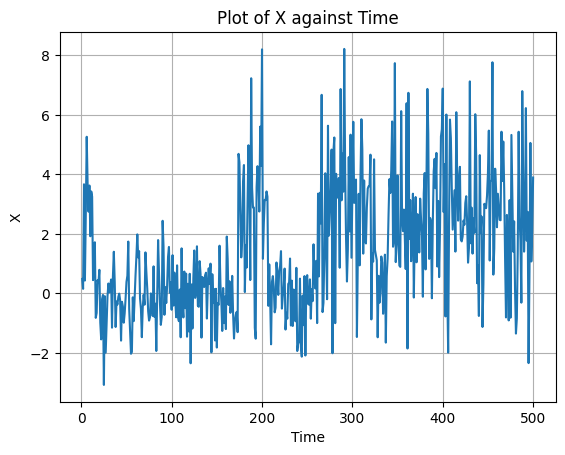

In [ ]:
tmax = 500
time = np.arange(1, tmax+1)
X, S = h.rand(tmax)

# Plotting
plt.plot(time, X[0])
plt.title('Plot of X against Time')
plt.xlabel('Time')
plt.ylabel('X')
plt.grid(True)
plt.show()

### Question 5:

In [ ]:
b1 = GaussD( means=[0], stdevs=[1] )
b2 = GaussD( means=[0], stdevs=[2] )
h  = HMM( mc, [b1, b2])
tmax = 500
time = np.arange(1, tmax+1)

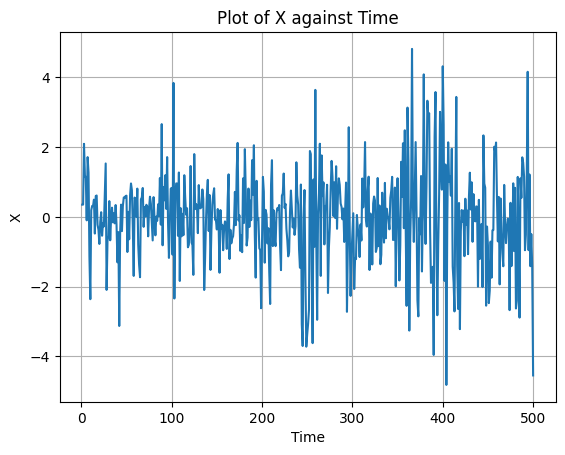

In [ ]:
X, S = h.rand(tmax)

plt.plot(time, X[0])
plt.title('Plot of X against Time')
plt.xlabel('Time')
plt.ylabel('X')
plt.grid(True)
plt.show()

### Question 6:

In [ ]:
q = np.array([0.75, 0.25])
A = np.array([[0.1, 0.8, 0.1], [0.8, 0.1,0.1]])
tmax = 10
mc = MarkovChain(q, A)
b1 = GaussD( means=[0], stdevs=[1] )
b2 = GaussD( means=[3], stdevs=[2] )
h  = HMM( mc, [b1, b2])
X, S = h.rand(tmax)